# Exploratory data analysis

In this notebook we want to gain some more insight on the data.  
As a prelimiary description

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_preprocessing.data_handlers import load_data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
df = load_data()

In [12]:
df.head(10)

,date,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,avg_wind_speed,avg_clouds
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,2.0,0.0
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,2.0,0.0
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,2.4,0.0
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,2.4,0.0
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,2.4,0.0
5,2015-01-01 05:00:00+01:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,53.63,2.4,0.0
6,2015-01-01 06:00:00+01:00,401.0,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,43.0,74.0,34.0,186.0,4397.0,20010.0,51.73,2.4,0.0
7,2015-01-01 07:00:00+01:00,408.0,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,43.0,72.0,35.0,189.0,3992.0,20377.0,51.43,2.4,0.0
8,2015-01-01 08:00:00+01:00,413.0,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,43.0,73.0,54.0,198.0,3629.0,20094.0,48.98,1.4,0.0
9,2015-01-01 09:00:00+01:00,419.0,177.0,4137.0,3437.0,163.0,2170.0,1041.0,1357.0,7097.0,43.0,74.0,743.0,198.0,3073.0,20637.0,54.20,1.4,0.0


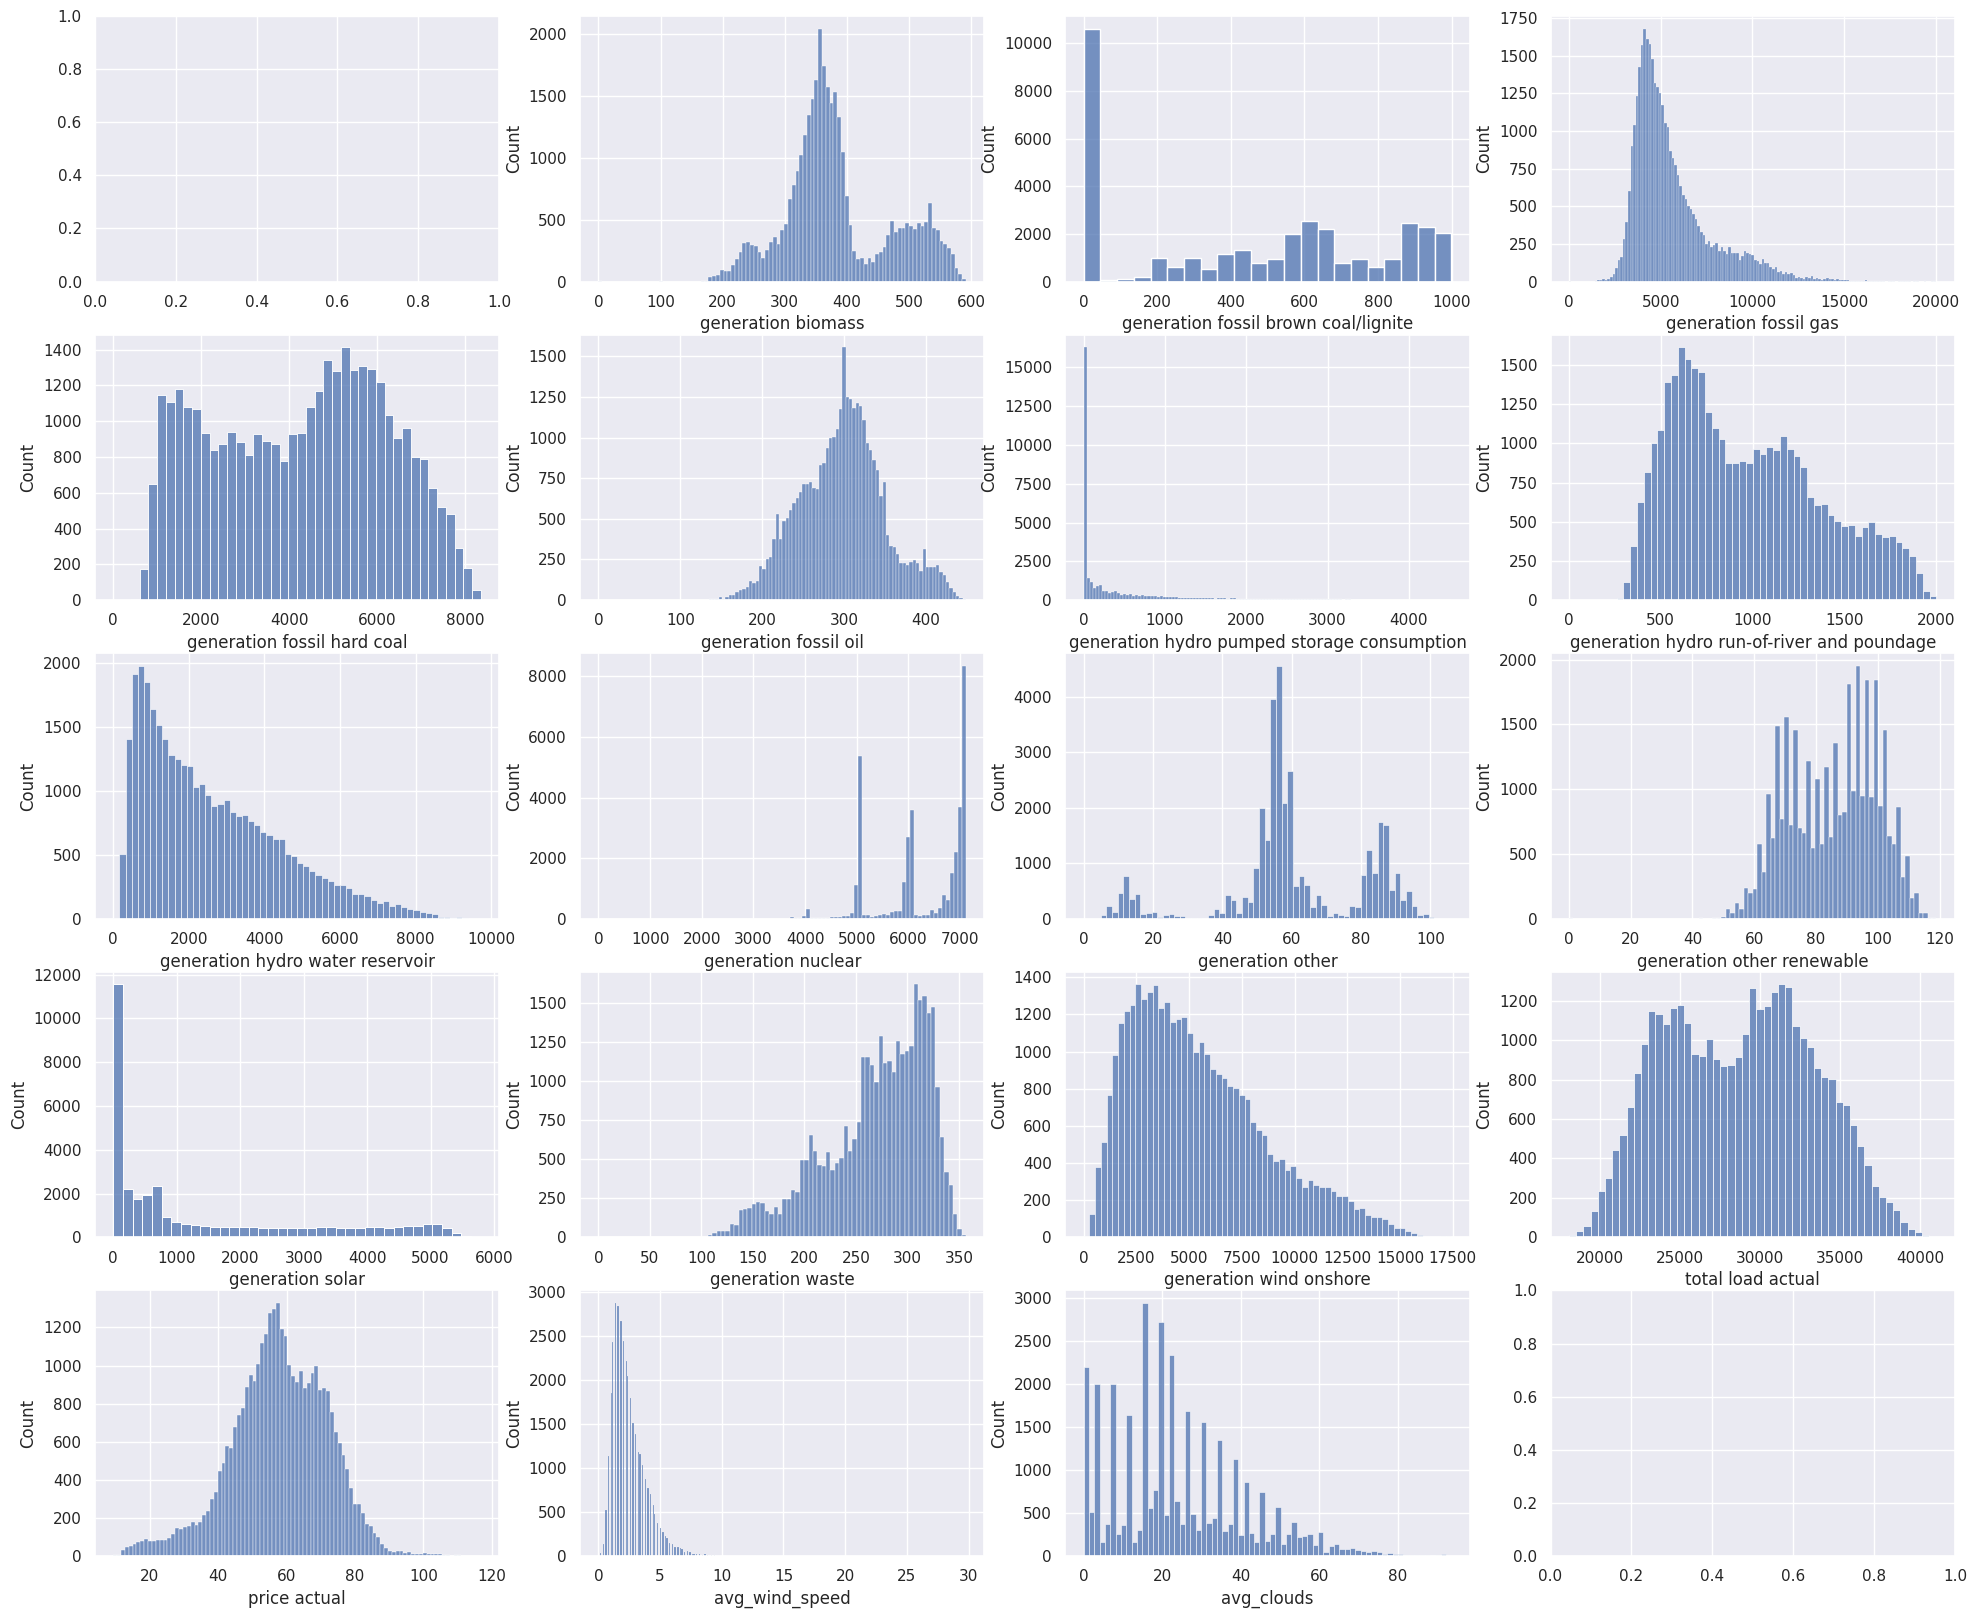

In [39]:
f, axes = plt.subplots(5, 4, figsize=(24, 20))
for i, col in enumerate(df.columns):
    if col == "date":
        continue
    sns.histplot(df[col], ax=axes[int(i // 4), int(i % 4)])

Except for the columns "total load actual", "price actual", "avg_wind_speed", "avg_clouds", each plot represents how much energy is generated from a specific source. "total load actual" is the energy demand; "price actual" is the electricity price, which is our target variable; "avg_wind_speed" is the average wind speed across 5 Spanish cities; "avg_clouds" is a the average of a measurement of how much the sky is covered across 5 Spanish cities.

We notice that some sources of energy have a very small impact on the overall production. For instance "generation other" is orders of magnitude smaller than "generation nuclear". Moreover some distributions have very high variance and a mode close to 0 (e.g. "generation solar"). This is due to the fact that these sources of energy are inactive for most of the time periods under consideration.  

We see that the target variable "price actual" has a central tendency and a slighlty fatter tail on the left side.  


## Deeper dive into the target variable

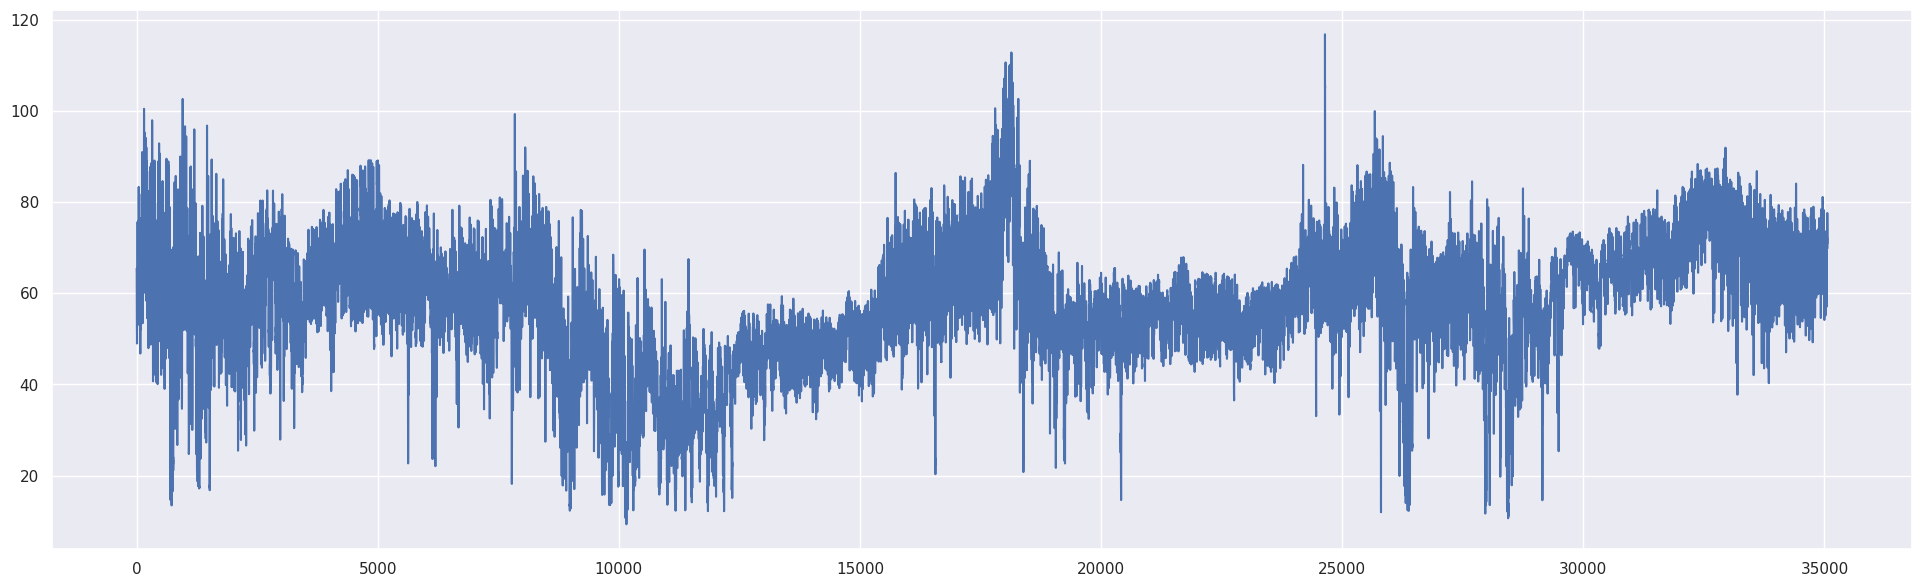

In [57]:
fig = plt.figure(figsize=(24, 7))
plt.plot(df["price actual"])

The price time series looks visually stationary in the period under consideration. We won't run a statistical test, as for our purposes this intuition is good enough.  

It is reasonable to expect the electicity price to display some periodic behaviour during the day, as people go form home to the office to home again. To confirm this, we plot the autocorrelation of "price actual" with lag 100

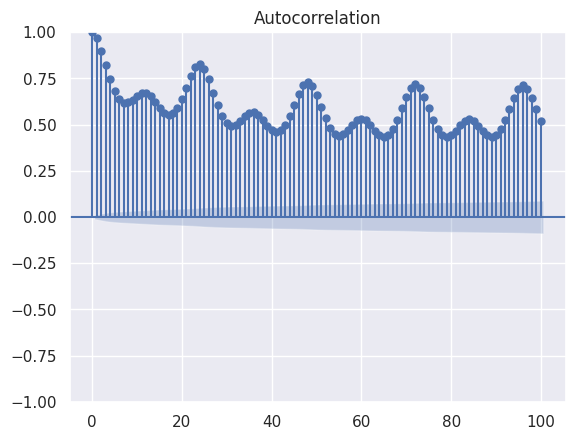

In [60]:
plot_acf(df['price actual'], lags=100)
plt.show()

We can indeed see that there is strong autocorrelation approximately every 24 hours. Motivated by this insight we are going to try a LSTM trained on the price in the last 24h as a baseline model.

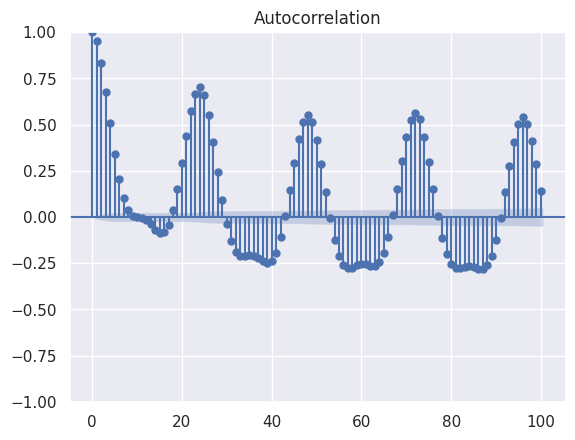

In [61]:
plot_acf(df['total load actual'], lags=100)
plt.show()

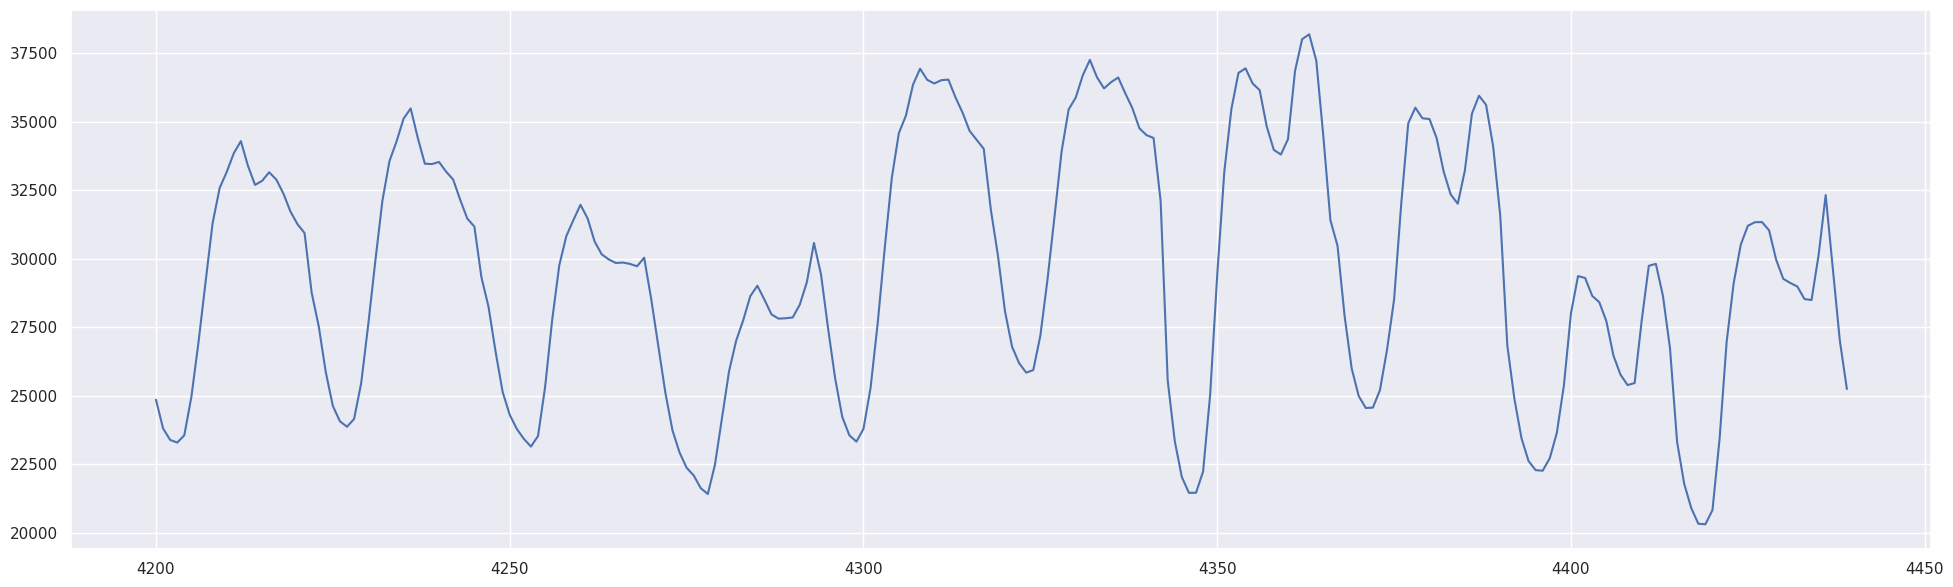

In [63]:
fig = plt.figure(figsize=(24, 7))
plt.plot(df["total load actual"].iloc[4200:4440])